In [26]:
import re
import pandas as pd
from nltk.translate.meteor_score import single_meteor_score
from nltk.translate.chrf_score import sentence_chrf

# Load file content
file_path = "GPTgenerated.txt"
with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()

# Regex pattern to extract the translation triplets
pattern = re.compile(
    r"Testo di input:\s*Sumerian:\s+(?P<testo_input>.*?)\nEnglish:\s*\nTraduzione effettiva:\s+(?P<traduzione_effettiva>.*?)\nTesto Generato: Sumerian:.*?\nEnglish:\s+(?P<testo_generato>.*?)(?=\n---|\Z)",
    re.DOTALL
)

matches = pattern.findall(text)

# Process each match
data = []
for m in matches:
    input_text = m[0].strip()
    true_translation = m[1].strip()
    generated_translation = m[2].strip()

    meteor = single_meteor_score(true_translation.split(), generated_translation.split())
    chrf = sentence_chrf(true_translation, generated_translation)

    data.append({
        "input_text": input_text,
        "true_translation": true_translation,
        "generated_text": generated_translation,
        "METEOR": meteor,
        "chrF": chrf,
    })

# Save final dataset
df = pd.DataFrame(data)
df.to_csv("backtranslation_roundtrip_eval.csv", index=False)
df

,input_text,true_translation,generated_text,METEOR,chrF
0,1(u) la₂ 1(diš) udu u₄ 2(u) 8(diš)-kam ki ab-b...,"9 rams, 28th day, from Abba-saga, Nalu accepte...","9 rams, 28th day, from Abba-saga, Nalu accepte...",0.871614,0.849497
1,3(diš) 1/2(diš) gin₂ 1(u) 5(diš) še ku₃-babbar...,"3 1/2 shekels 15 grains of silver, for interes...","(For) 3 1/3 shekels 15 grains silver, (for) Ur...",0.368595,0.464667
2,6(diš) murgu₂ peš 2(geš₂) 4(u) 5(diš) {geš}umb...,"6 date palm spines, 165 boat ribs(?), 6 pine t...","6 ewes, 25 billy goats, full grown, 65 fat-tai...",0.260639,0.398453
3,1/3(diš) kuš gu₄ 1(diš) sa gu₄ 2(diš) kuš udu ...,"1/3 oxen hide, 1 (bundle of) oxen sinews, 2 sh...","1 jug wort, 1 billy goat, 2 jennies, suckling,...",0.260204,0.337466
4,da-da u₃-na-a-du₁₁ 3(gešʾu) sa gi <unk> giri₃-...,"To Dada, say: “1800 bundles of fire-reeds, to(...","To Dada speak: 30 bundles of fodder reed, via ...",0.290453,0.449618
5,...6(diš) geme₂ 3(ban₂) ...1(diš)-še₃ šu ur₃ z...,"n + 6 female laborers, 3 ban2, for one day, to...","n + 6 female laborers, 3 ban2 each, for 3 mont...",0.303996,0.312806
6,1(u) 4(diš) gu₄ geš ki na-sa₆-ta e₂-u₆-e i₃-da...,14 plough oxen from Nasa E’u’e received; month...,14 plough oxen from Nasa E’u’e accepted; month...,0.535714,0.547376
7,1(diš) am gu₄ 1(diš) amar <unk> am u₄ 2(u) 1(d...,"1 wild ox, 1 wild heifer calf, 21st day, from ...","1 bull calf, 1 full-grown billy, 21st day; fro...",0.432361,0.629034
8,2(geš₂) 2(u) 4(diš) gu₄ ab₂ hi-a 5(gešʾu) 8(ge...,"144 various oxen and cows, 3513 various sheep ...","144 oxen and cows, 35 sheep, barley-fed, from ...",0.144185,0.288682
9,2(u) {geš}il₂ kun-zi-da a-pi₄-sal₄{ki}še₃ geme...,"20 corvée baskets: to the weir of Apisal, did ...","20 shekels silver, from the account of Apisal ...",0.459816,0.501395


In [28]:
df["METEOR"].mean(), df["chrF"].mean()

(0.42913159136424994, 0.5168817358530862)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

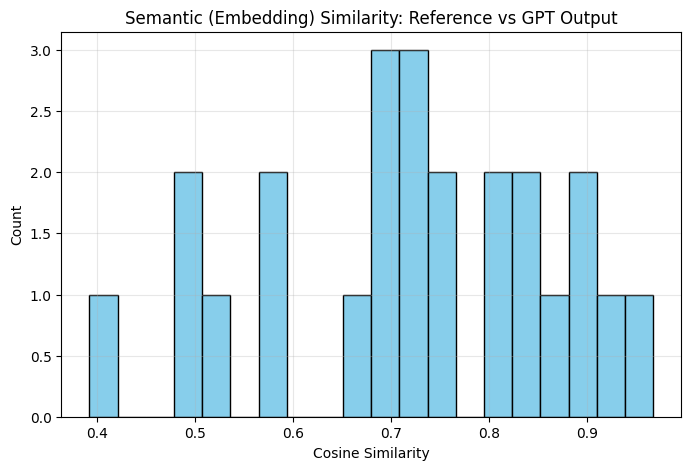


Embedding Similarity Summary:
count    24.000000
mean      0.721584
std       0.153898
min       0.391806
25%       0.650990
50%       0.724327
75%       0.832195
max       0.967076
Name: embed_cosine, dtype: float64

Top-5 Closest (🍀 High similarity):
                                         reference_en  \
0   9 rams, 28th day, from Abba-saga, Nalu accepte...   
18  633 carcasses, various sheep and goats, from N...   
19  Basket-of-tablets: copies, sealed documents, m...   
23  Basket-of-tablets: accounts of Idin-Erra, from...   
10  1 ram, with fleece, slaughtered, from Lu-Utu. ...   

                                         generated_en  embed_cosine  
0   9 rams, 28th day, from Abba-saga, Nalu accepte...      0.967076  
18  1333 carcasses, various sheep, grass-fed, from...      0.913056  
19  Basket-of-tablets: sealed documents of conveya...      0.908848  
23  Basket-of-tablets: accounts of Idin-Erra, from...      0.886375  
10  1 sheep, barley-fed, slaughtered, from Lu-Utu,...

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util

# Read and parse your log file
file_path = "GPTgenerated.txt"
with open(file_path, "r", encoding="utf-8") as f:
    raw = f.read()

# Regex to pull out: Sumerian input (ignored here), reference English, GPT English
pattern = re.compile(
    r"Testo di input:\s*Sumerian:\s+.*?\nEnglish:\s*\n"
    r"Traduzione effettiva:\s+(.*?)\n"
    r"Testo Generato:.*?\nEnglish:\s+(.*?)(?=\n---|\Z)",
    re.DOTALL
)
matches = pattern.findall(raw)

# Build a DataFrame
df = pd.DataFrame(matches, columns=["reference_en", "generated_en"])
df["reference_en"] = df["reference_en"].str.strip()
df["generated_en"] = df["generated_en"].str.strip()

# Load a pre-trained SentenceTransformer
#    This model maps sentences to 384-dim vectors where semantically similar
#    sentences lie close by (high cosine sim).
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Encode all sentences into embeddings
emb_ref = model.encode(df["reference_en"].tolist(), convert_to_tensor=True)
emb_gen = model.encode(df["generated_en"].tolist(),  convert_to_tensor=True)

# Compute pairwise cosine similarities
#    cos_sim = (A · B) / (||A|| · ||B||) ∈ [-1,1], where 1 = identical
cosine_scores = util.cos_sim(emb_ref, emb_gen).diagonal().cpu().numpy()
df["embed_cosine"] = cosine_scores

# Plot the distribution of semantic similarity
plt.figure(figsize=(8,5))
plt.hist(df["embed_cosine"], bins=20, edgecolor="black", color="skyblue")
plt.title("Semantic (Embedding) Similarity: Reference vs GPT Output")
plt.xlabel("Cosine Similarity")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()

# Print summary and best/worst cases
print("\nEmbedding Similarity Summary:")
print(df["embed_cosine"].describe())

print("\nTop-5 Closest (High similarity):")
print(df.nlargest(5, "embed_cosine")[["reference_en","generated_en","embed_cosine"]])

print("\nTop-5 Furthest (Low similarity):")
print(df.nsmallest(5, "embed_cosine")[["reference_en","generated_en","embed_cosine"]])


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 2.8 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


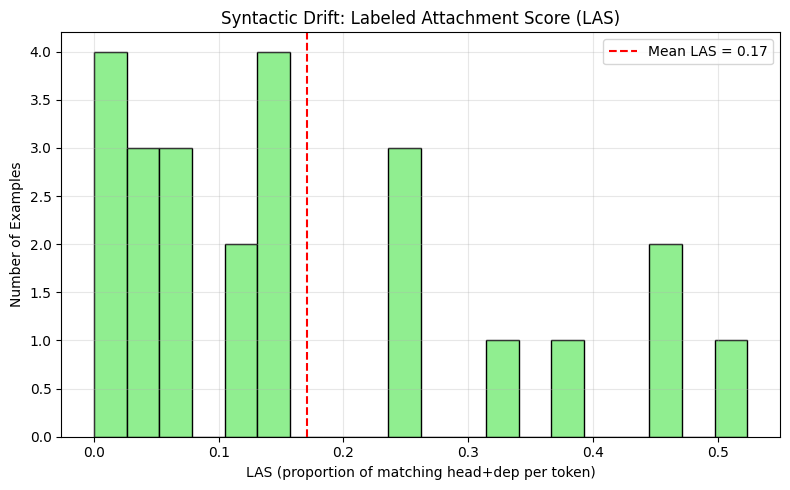

Syntactic LAS Summary:
count    24.000000
mean      0.170610
std       0.158251
min       0.000000
25%       0.040843
50%       0.126818
75%       0.250000
max       0.523810
Name: LAS, dtype: float64

Worst Syntactic Drift (lowest LAS):
                                            reference  \
8   144 various oxen and cows, 3513 various sheep ...   
4   To Dada, say: “1800 bundles of fire-reeds, to(...   
13  (1) 15 male laborer days on duty at the basin ...   
2   6 date palm spines, 165 boat ribs(?), 6 pine t...   
1   3 1/2 shekels 15 grains of silver, for interes...   

                                            generated       LAS  
8   144 oxen and cows, 35 sheep, barley-fed, from ...  0.000000  
4   To Dada speak: 30 bundles of fodder reed, via ...  0.019231  
13  15 laborer workdays, at the threshing floor of...  0.024390  
2   6 ewes, 25 billy goats, full grown, 65 fat-tai...  0.025641  
1   (For) 3 1/3 shekels 15 grains silver, (for) Ur...  0.028571  

Best Syntactic Preserv

In [4]:
import re
import pandas as pd
import spacy
import spacy.cli
import matplotlib.pyplot as plt
spacy.cli.download("en_core_web_sm")

# Load spaCy English parser
nlp = spacy.load("en_core_web_sm")

# Read & parse GPTgenerated.txt
file_path = "GPTgenerated.txt"
with open(file_path, encoding="utf-8") as f:
    raw = f.read()

pattern = re.compile(
    r"Testo di input:\s*Sumerian:.*?\nEnglish:\s*\n"
    r"Traduzione effettiva:\s+(.*?)\n"
    r"Testo Generato:.*?\nEnglish:\s+(.*?)(?=\n---|\Z)",
    re.DOTALL
)
pairs = pattern.findall(raw)

records = []
for ref_en, gen_en in pairs:
    ref_sent = ref_en.strip()
    gen_sent = gen_en.strip()

    # Parse both sentences
    doc_ref = nlp(ref_sent)
    doc_gen = nlp(gen_sent)

    # Compute Labeled Attachment Score (LAS)
    #    For tokens i in both docs: compare (gen.head.i, gen.dep_) vs (ref.head.i, ref.dep_)
    #    Only consider up to min(len(ref), len(gen)) tokens to align by position.
    length = min(len(doc_ref), len(doc_gen))
    correct = 0
    for i in range(length):
        token_ref = doc_ref[i]
        token_gen = doc_gen[i]
        # match head index and dependency label
        if (token_gen.head.i == token_ref.head.i) and (token_gen.dep_ == token_ref.dep_):
            correct += 1
    las = correct / length if length > 0 else 0.0

    records.append({
        "reference": ref_sent,
        "generated": gen_sent,
        "LAS": las
    })

df = pd.DataFrame(records)

# Plot LAS distribution
plt.figure(figsize=(8,5))
plt.hist(df["LAS"], bins=20, color="lightgreen", edgecolor="black")
plt.title("Syntactic Drift: Labeled Attachment Score (LAS)")
plt.xlabel("LAS (proportion of matching head+dep per token)")
plt.ylabel("Number of Examples")
plt.axvline(df["LAS"].mean(), color="red", linestyle="--",
            label=f"Mean LAS = {df['LAS'].mean():.2f}")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Summary & examples
print("Syntactic LAS Summary:")
print(df["LAS"].describe())

print("\nWorst Syntactic Drift (lowest LAS):")
print(df.nsmallest(5, "LAS")[["reference","generated","LAS"]])
print("\nBest Syntactic Preservation (highest LAS):")
print(df.nlargest(5, "LAS")[["reference","generated","LAS"]])


Notice how bad prediction of numbers is probably worsening the drift.